## 1. 基于数据集多重抽样的分类器

前面已经介绍了五种不同的分类算法，各有优缺点，将不同分类器组合起来，这种方法被称为“集成方法”（ensemble method）或者“元算法”（meta-algorithm）。

AdaBoost算法：

> 优点：泛化错误率地，易编码，可以应用在大部分分类器上，无参数调整

> 缺点：对离散点敏感

> 适用数据类型：数值型和标称型

### 1.1 bagging: 基于数据随机重抽样的分类器构建方法

自举汇聚法（bootstrap aggregating）是从原始数据集随机选择S次后得到S个新数据集的一种技术。新数据集和原始数据集的大小相等。新数据集建好之后，就可以将某个学习算法分别作用于每个数据集，就得到了S和分类器。

还有一些更先进的bagging方法，比如随机森林（random forest）。

### 1.2 boosting

bagging中的分类器是通过串行训练而获得的，每个新分类器都根据已训练出的分类器的性能进行训练，而boosting是通过集中关注被已有分了其错分的那些数据来重新获得新的分类器。

boosting的方法拥有多个版本，我们只关注一个最流行的版本：AdaBoost

## 2. 训练算法

AdaBoost是adaptive boosting的搜写，一开始每个样本的权重是相同的，先训练出一个弱分类器，计算错误率，然后重新调整每个样本的权重，多次训练得到最终的分类结果。

错误率$\varepsilon$=未正确分类的样本数/所有样本数

$\alpha =\dfrac {1}{2}\ln \left( \dfrac {1-\varepsilon }{\varepsilon }\right)$

如果某个样本被正确分类：$D_{i}\left( t+1\right) =\dfrac {D^{\left( t\right) }_{i}e^{-\alpha }}{sum\left( D\right) }$

如果某个样本被错误分类：$D_{i}\left( t+1\right) =\dfrac {D^{\left( t\right) }_{i}e^{\alpha }}{sum\left( D\right) }$

## 3. 基于单层决策树

单层决策树（decision stump）是一种简单的决策树吗，只有一次分裂过程。

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def loadSimpData():
    dataMat = np.mat([[1, 2.1],
                     [2, 1.1],
                     [1.3, 1],
                     [1, 1],
                     [2, 1]])
    classLabels = [1.0, 1.0, -1.0, -1.0, 1.0]   
    return dataMat, classLabels

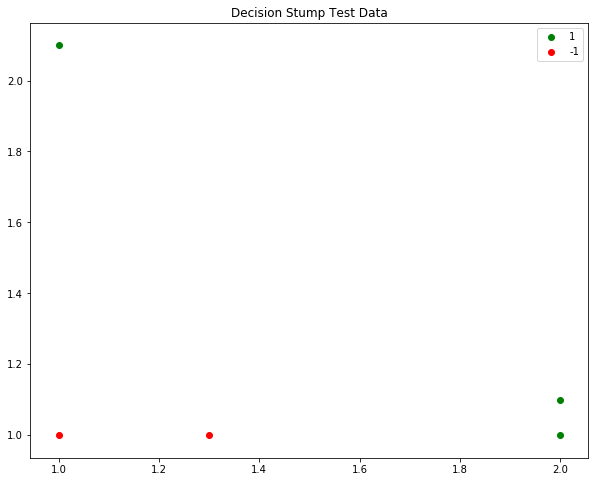

In [3]:
# plot
dataMat, classLabels = loadSimpData()
m = len(classLabels)
labels = np.array(classLabels)
data = np.array(dataMat)
data1 = data[labels == 1]
data2 = data[labels == -1]
fig,ax = plt.subplots(figsize=(10, 8))
ax.scatter(data1[:, 0], data1[:, 1], c='g', label='1')
ax.scatter(data2[:, 0], data2[:, 1], c='r', label='-1')
plt.title('Decision Stump Test Data')
plt.legend(loc='best')
plt.show()

是没有办法从某个坐标轴选择一个值来将两类分开，但是多个单侧决策树就可以了。

In [4]:
def stumpClassify(dataMatrix, dimen, threshVal, threshIneq):
    m, n = dataMatrix.shape
    retArray = np.ones((m, 1))
    if threshIneq == 'lt':
        retArray[dataMatrix[:, dimen] <= threshVal] = -1.0
    else:
        retArray[dataMatrix[:, dimen] > threshVal] = -1.0
    return retArray

In [9]:
def buildStump(dataArr, classLabels, D):
    dataMatrix = np.mat(dataArr)
    labelMat = np.mat(classLabels).T
    m, n = dataMatrix.shape
    numSteps = 10
    bestStump = {}
    bestClasEst = np.mat(np.zeros((m, 1)))
    minError = np.inf
    for i in range(n):
        rangeMin = dataMatrix[:, i].min()
        rangeMax = dataMatrix[:, i].max()
        stepSize = (rangeMax-rangeMin)/numSteps
        for j in range(-1, int(numSteps)+1):
            for inequal in ['lt', 'gt']:
                threshVal = (rangeMin + float(j) * stepSize)
                predictVals = stumpClassify(dataMatrix, i, threshVal, inequal)
                errArr = np.mat(np.ones((m, 1)))
                errArr[predictVals == labelMat] = 0
                weightedError = D.T * errArr
                #print('split: dim {0}, thresh: {1}, thresh inequal: {2}, the weighted error is{3}'.format(i, threshVal, inequal, weightedError))
                if weightedError < minError:
                    minError = weightedError
                    bestClasEst = predictVals.copy()
                    bestStump['dim'] = i
                    bestStump['thresh'] = threshVal
                    bestStump['ineq'] = inequal
    return bestStump, minError, bestClasEst

In [8]:
D= np.mat(np.ones((5, 1))/5)
buildStump(dataMat, classLabels, D)

split: dim 0, thresh: 0.9, thresh inequal: lt, the weighted error is[[ 0.4]]
split: dim 0, thresh: 0.9, thresh inequal: gt, the weighted error is[[ 0.6]]
split: dim 0, thresh: 1.0, thresh inequal: lt, the weighted error is[[ 0.4]]
split: dim 0, thresh: 1.0, thresh inequal: gt, the weighted error is[[ 0.6]]
split: dim 0, thresh: 1.1, thresh inequal: lt, the weighted error is[[ 0.4]]
split: dim 0, thresh: 1.1, thresh inequal: gt, the weighted error is[[ 0.6]]
split: dim 0, thresh: 1.2, thresh inequal: lt, the weighted error is[[ 0.4]]
split: dim 0, thresh: 1.2, thresh inequal: gt, the weighted error is[[ 0.6]]
split: dim 0, thresh: 1.3, thresh inequal: lt, the weighted error is[[ 0.2]]
split: dim 0, thresh: 1.3, thresh inequal: gt, the weighted error is[[ 0.8]]
split: dim 0, thresh: 1.4, thresh inequal: lt, the weighted error is[[ 0.2]]
split: dim 0, thresh: 1.4, thresh inequal: gt, the weighted error is[[ 0.8]]
split: dim 0, thresh: 1.5, thresh inequal: lt, the weighted error is[[ 0.2]]

({'dim': 0, 'ineq': 'lt', 'thresh': 1.3}, matrix([[ 0.2]]), array([[-1.],
        [ 1.],
        [-1.],
        [-1.],
        [ 1.]]))

## 4. 完整AdaBoost算法的实现

In [33]:
def adaBoostTrainDS(dataArr, classLabels, numIter=40):
    weakClassArr = []
    m, n = dataArr.shape
    D = np.mat(np.ones((m, 1))/m)
    aggClassEst = np.mat(np.zeros((m, 1)))
    for i in range(numIter):
        bestStump, error, classEst = buildStump(dataArr, classLabels, D)
        #print('D: {0}'.format(D.T))
        alpha = float(0.5*np.log((1-error)/max(error, 1e-16)))
        bestStump['alpha'] = alpha
        weakClassArr.append(bestStump)
        #print('classEst: {0}'.format(classEst.T))
        expon = np.multiply(-1*alpha*np.mat(classLabels).T, classEst)
        D = np.multiply(D, np.exp(expon))
        D = D/D.sum()
        aggClassEst += alpha*classEst
        #print('aggClassEst: {0}'.format(aggClassEst.T))
        aggErrors = np.multiply(np.sign(aggClassEst) != np.mat(classLabels).T, np.ones((m, 1)))
        errorRate = aggErrors.sum()/m
        print('total error: {0}\n'.format(errorRate))
        if errorRate == 0.0:
            break
    return weakClassArr, aggClassEst

In [12]:
classifierArray = adaBoostTrainDS(dataMat, classLabels, 9)

D: [[ 0.2  0.2  0.2  0.2  0.2]]
classEst: [[-1.  1. -1. -1.  1.]]
aggClassEst: [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error: 0.2

D: [[ 0.5    0.125  0.125  0.125  0.125]]
classEst: [[ 1.  1. -1. -1. -1.]]
aggClassEst: [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error: 0.2

D: [[ 0.28571429  0.07142857  0.07142857  0.07142857  0.5       ]]
classEst: [[ 1.  1.  1.  1.  1.]]
aggClassEst: [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error: 0.0



In [13]:
classifierArray

[{'alpha': 0.6931471805599453, 'dim': 0, 'ineq': 'lt', 'thresh': 1.3},
 {'alpha': 0.9729550745276565, 'dim': 1, 'ineq': 'lt', 'thresh': 1.0},
 {'alpha': 0.8958797346140273,
  'dim': 0,
  'ineq': 'lt',
  'thresh': 0.90000000000000002}]

## 5. 测试算法：基于AdaBoost的分类

In [26]:
def adaClassify(datToClass, classifierArr):
    dataMatrix = np.mat(datToClass)
    m, n = dataMatrix.shape
    aggClassEst = np.mat(np.zeros((m ,1)))
    for i in range(len(classifierArr)):
        classEst = stumpClassify(dataMatrix, classifierArr[i]['dim'], classifierArr[i]['thresh'], classifierArr[i]['ineq'])
        aggClassEst += classifierArr[i]['alpha']*classEst
        #print(aggClassEst)
    return np.sign(aggClassEst)

In [16]:
dataArr, labelArr = loadSimpData()
classifierArr = adaBoostTrainDS(dataArr, labelArr, 30)
adaClassify([0, 0], classifierArr)

D: [[ 0.2  0.2  0.2  0.2  0.2]]
classEst: [[-1.  1. -1. -1.  1.]]
aggClassEst: [[-0.69314718  0.69314718 -0.69314718 -0.69314718  0.69314718]]
total error: 0.2

D: [[ 0.5    0.125  0.125  0.125  0.125]]
classEst: [[ 1.  1. -1. -1. -1.]]
aggClassEst: [[ 0.27980789  1.66610226 -1.66610226 -1.66610226 -0.27980789]]
total error: 0.2

D: [[ 0.28571429  0.07142857  0.07142857  0.07142857  0.5       ]]
classEst: [[ 1.  1.  1.  1.  1.]]
aggClassEst: [[ 1.17568763  2.56198199 -0.77022252 -0.77022252  0.61607184]]
total error: 0.0

[[-0.69314718]]
[[-1.66610226]]
[[-2.56198199]]


matrix([[-1.]])

## 6. 示例：在一个难数据集上应用AdaBoost

In [19]:
def loadDataSet(fileName):
    with open(fileName) as f:
        dataMat = []
        labelMat = []
        for line in f.readlines():
            lineArr = []
            curLine = line.strip().split('\t')
            for i in range(len(curLine)-1):
                lineArr.append(float(curLine[i]))
            dataMat.append(lineArr)
            labelMat.append(float(curLine[-1]))
    return np.array(dataMat), labelMat

In [23]:
dataArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray = adaBoostTrainDS(dataArr, labelArr, 10)

total error: 0.2842809364548495

total error: 0.2842809364548495

total error: 0.24749163879598662

total error: 0.24749163879598662

total error: 0.25418060200668896

total error: 0.2408026755852843

total error: 0.2408026755852843

total error: 0.22073578595317725

total error: 0.24749163879598662

total error: 0.23076923076923078



In [29]:
testArr, testLabelArr = loadDataSet('horseColicTest2.txt')
prediction10 = adaClassify(testArr, classifierArray)
errArr = np.mat(np.ones((67, 1)))
errArr[prediction10 != np.mat(testLabelArr).T].sum()/67

0.23880597014925373

会发现错误率呈现一个先减少后上升的取视，这类现象称为过拟合（overfitting）。

## 7. 非均衡分类问题

### 7.1 其他分类性能度量指标：正确率、召回率及ROC曲线

一直在基于错误率衡量分类器任务的成功程度，错误率指的是在所有测试样例中错分的样例比例，实际上这样的度量错误掩盖了样例如何被分错的事实。

机器学习中有个普遍使用的工具——混淆矩阵，能帮助人们更好的了解分类中的错误。

TP（True Positive）：将一个正例判为正例

FN（False Negative）：将一个正例判为反例

FP（False Positive）：将一个反例判为正例

TN（True Negative）：将一个反例判为反例

正确率（precision）=TP/（TP+FP）

召回率（recall）=TP/（TP+FN）

构建一个同时保证正确率和召回率最大的分类器是很困难的。

另一个度量分类中的非均衡性的工具是ROC曲线。

In [32]:
def plotROC(predStrengths, classLabels):
    cur = (1.0, 1.0)
    ySum = 0.0
    numPosClas = np.sum(np.array(classLabels)==1.0)
    yStep = 1/float(numPosClas)
    xStep = 1/float(len(classLabels)-numPosClas)
    sortedIndices = predStrengths.argsort()
    fig = plt.figure()
    fig.clf()
    ax = plt.subplot(111)
    for index in sortedIndices.tolist()[0]:
        if classLabels[index] == 1.0:
            delX = 0
            delY = yStep
        else:
            delX = xStep
            delY = 0
            ySum += cur[1]
        ax.plot([cur[0], cur[0]-delX], [cur[1], cur[1]-delY], c='b')
        cur = (cur[0]-delX, cur[1]-delY)
    ax.plot([0, 1], [0, 1], 'b--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve for AdaBoost Horse Colic Detection System')
    ax.axis([0, 1, 0, 1])
    plt.show()
    print('the Area Under the Curve is: {0}'.format(ySum*xStep))

In [35]:
dataArr, labelArr = loadDataSet('horseColicTraining2.txt')
classifierArray, aggClassEst = adaBoostTrainDS(dataArr, labelArr, 10)

total error: 0.2842809364548495

total error: 0.2842809364548495

total error: 0.24749163879598662

total error: 0.24749163879598662

total error: 0.25418060200668896

total error: 0.2408026755852843

total error: 0.2408026755852843

total error: 0.22073578595317725

total error: 0.24749163879598662

total error: 0.23076923076923078



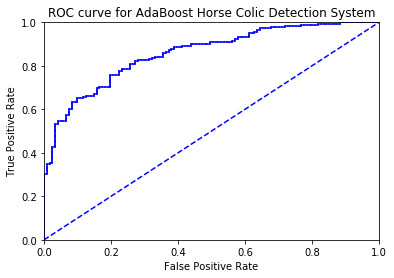

the Area Under the Curve is: 0.8582969635063604


In [36]:
plotROC(aggClassEst.T, labelArr)

### 7.2 基于代价函数的分类器决策控制

采用一种被称为**代价敏感的学习（cost-sensitive learning）**的方法。

### 7.3 处理非均衡问题的数据抽样方法

可以对分类器的训练数据进行改造，如欠抽样（删除样例）或者过抽样（复制样例）。

通常也会存在某个罕见的类别需要识别，可以选择离决策边界较远的样例删除。

> 总结：集成方法通过组合多个分类器的分类结果，获得比简单的但分类器更好的分类结果。AdaBoost算法可以接受多种分类器，功能强大，训练的时候仍然需要注意非均衡分类的问题。